In [6]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Applying wavelet on original image

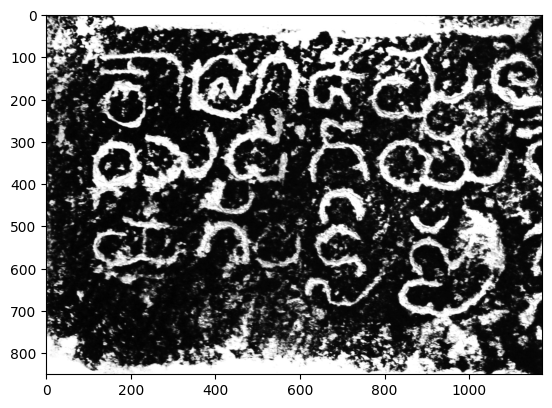

In [2]:
noisy_image = cv2.imread(r'C:\Users\Anirudh Koti\Epigraphy_denoising\Brahmi_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(noisy_image, cmap="gray")
plt.show()

In [3]:
coeffs = pywt.dwt2(noisy_image, 'haar')
cA, (cH, cV, cD) = coeffs

In [4]:
threshold = np.sqrt(2*np.log2(noisy_image.size)) * np.std(cD)
threshold = 1
cD_thresh = pywt.threshold(cD, threshold, mode='soft')

In [5]:
def remove_noise(noisy_image, threshold=0.02):
    coeffs = pywt.wavedec2(noisy_image, 'haar', level=5)
    coeffs = [pywt.threshold(c, threshold * np.max(c), mode='soft') if isinstance(c, np.ndarray) else c for c in coeffs]
    denoised_image = pywt.waverec2(coeffs, 'haar')
    denoised_image = np.uint8(denoised_image)

    return denoised_image

In [7]:
noisy_dir_path = r"noisy_images"
threshold = 0.009
denoised_dir_path = f"denoised_images_thresh={threshold}"

os.makedirs(denoised_dir_path, exist_ok=True)

for frame_name in os.listdir(noisy_dir_path):
    noisy_img_path = os.path.join(noisy_dir_path, frame_name)

    noisy_img = cv2.imread(noisy_img_path, cv2.IMREAD_GRAYSCALE)
    denoised_img = remove_noise(noisy_img, threshold)

    denoised_img_path = os.path.join(denoised_dir_path, frame_name)

    assert cv2.imwrite(denoised_img_path, denoised_img)